# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predictiong whether or not someone has heart disease based on their medical attributes.



In [1]:
steps = ['1. Proble definition', '2. Data', '3. Evaluation', '4. Features', '5. Modeling', '6. Experimentation']

In [2]:
steps

['1. Proble definition',
 '2. Data',
 '3. Evaluation',
 '4. Features',
 '5. Modeling',
 '6. Experimentation']

## 1. Problem Definition

In a statement,
> Given a clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2.Data

The Original data came from cleavland database from the UCI Machine Learning Repository.

There is also a version of it available on kaggle.

## 3. Evaluation 

> If we can reach 95% accuracy, we will pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data.

**Create data dictionary**

In [3]:
steps

['1. Proble definition',
 '2. Data',
 '3. Evaluation',
 '4. Features',
 '5. Modeling',
 '6. Experimentation']

## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.

In [4]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load Data 

In [5]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data set we are working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How to can you add, change or remove features to get more out of your data?

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

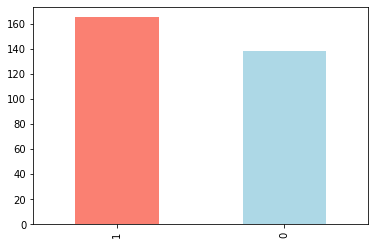

In [7]:
df.target.value_counts().plot(kind = "bar", color = [ "salmon", "lightblue"]);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to sex


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
## Comapre target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


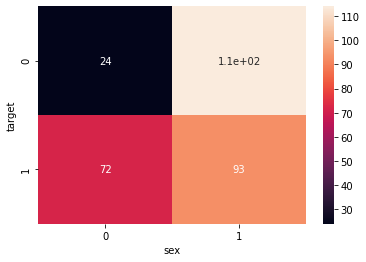

In [13]:
sns.heatmap(pd.crosstab(df.target, df.sex), annot = True);

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

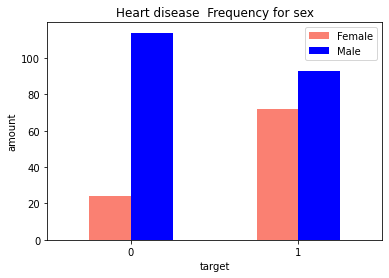

In [14]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    color=["salmon", "blue"])
plt.title("Heart disease  Frequency for sex")

plt.ylabel("amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

In [15]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

## Age vs max heart rate for disease

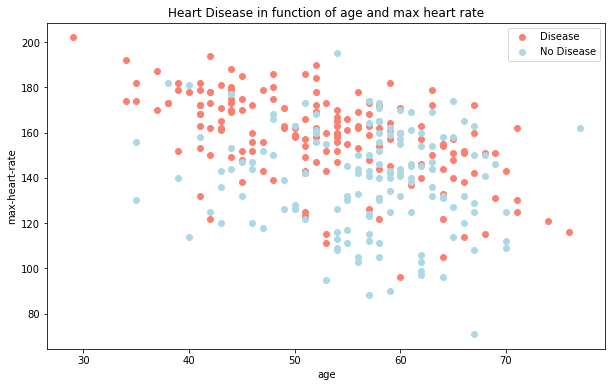

In [16]:
# creating another figure
plt.figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c = "salmon" )
# sactter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c = "lightblue")
# Add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("age")
plt.ylabel("max-heart-rate")
plt.legend(["Disease", "No Disease"])

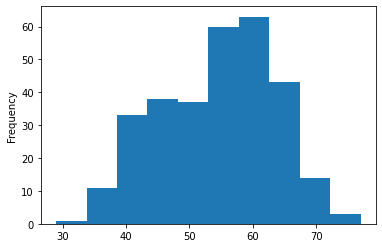

In [17]:
# check the distribution age column
df.age.plot.hist();

### Heart Disease Frequency per chest Pain Type

In [18]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


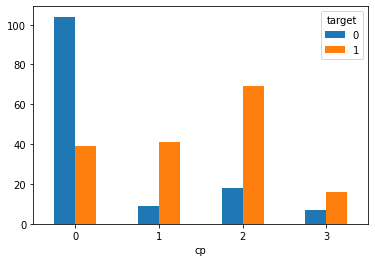

In [19]:
pd.crosstab(df.cp, df.target).plot.bar()
plt.xticks(rotation = 1);

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


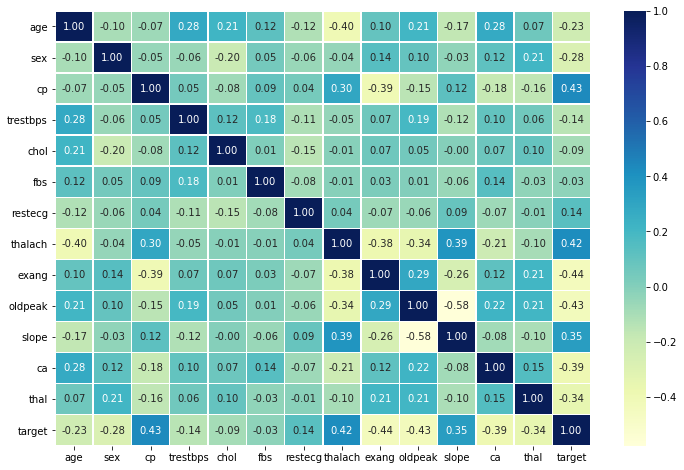

In [22]:
# Lets make a correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(corr_matrix, 
                 annot = True,
                 linewidth = 0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## Modeling

In [23]:
np.random.seed(42)
X = df.drop("target", axis = 1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

we will train it on training set.

And we'll test it on test set.

In [24]:
# put model in a dictionary

models = { "Logistic Regression" : LogisticRegression(max_iter=2000),
           "KNN" : KNeighborsClassifier(),
           "RandomForestClassifier" : RandomForestClassifier()}
model_scores = {}
def fit_and_score(models) :   
    np.random.seed(42)
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)
    return model_scores
fit_and_score(models)   

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RandomForestClassifier': 0.8360655737704918}

### Model comparison

In [25]:
model_compare = pd.DataFrame(model_scores, index=["model_score"])

In [26]:
model_compare

,Logistic Regression,KNN,RandomForestClassifier
model_score,0.885246,0.688525,0.836066


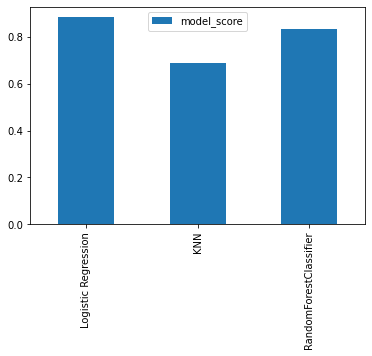

In [27]:
model_compare.T.plot.bar();

In [28]:
# Let's tune KNN

train_score = []

test_score = []

# Create a list of different value for n_neighbours

n_neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in n_neighbors :
    knn.set_params(n_neighbors = i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_score.append(knn.score(X_train, y_train))
    
    # Update the test score list
    test_score.append(knn.score(X_test, y_test))
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

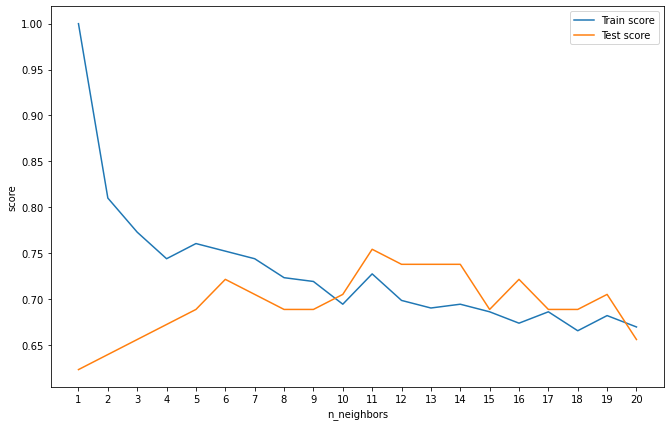

In [29]:
plt.figure(figsize=(11,7))
plt.plot(n_neighbors, train_score, label="Train score")
plt.plot(n_neighbors, test_score, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.legend();

In [30]:
print(f'Maximum KNN score on the test data: {max(test_score)*100:.2f}%')

Maximum KNN score on the test data: 75.41%


## Hyperparameter tuning with RandomizedSearchCV

We're going to tune : 
* LogisticRegression()
* RandomForestClassifier()
... using RandomizedSearchCV

In [31]:
# create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C" : np.logspace(-4, 4, 20),
               "solver" : ["liblinear"]}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = { "n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2),
            'ccp_alpha': [0.1]}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [32]:
# Tune Logistic Regression model
np.random.seed(42)

# setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                log_reg_grid,
                                cv = 5, 
                                n_iter = 10,
                                verbose = True)
#Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished


In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [35]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           rf_grid, 
                           cv=5,
                           n_iter = 10,
                           verbose = True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   56.2s finished


In [36]:
rs_rf.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': 10,
 'ccp_alpha': 0.1}

In [37]:
rs_rf.score(X_test, y_test)

0.8852459016393442

## Hyperparameter tuning with GridSearchCV

Since a logistic regression model provide the best offer so far, we'll try and improve them again using GridSearchCV...

In [38]:
# Different Hyperparameter for our logisticRegression
log_reg_grid = {"C" : np.logspace(-4, 4, 30),
                "solver" :  ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(max_iter=1000),
                          log_reg_grid,
                          cv = 5,
                          verbose = True,
                          n_jobs=-1,
                          error_score=0
                           )
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.2s finished


In [39]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

# Evaluating our tuned machine learning classifier, beyond accuracy.

* ROC curve and AUC score
* Confusion matrix
* Classification Report
* Precision
* Recall
* F1-score

..... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make prediction.

In [41]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [43]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

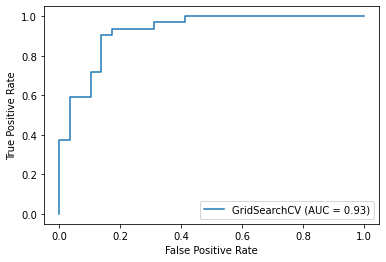

In [44]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

In [45]:
conf_mat = confusion_matrix(y_test, y_preds)

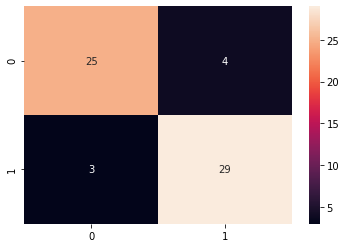

In [46]:
sns.heatmap(conf_mat, annot = True);

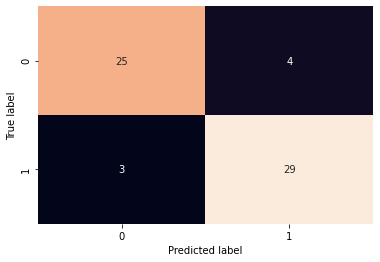

In [47]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
plot_conf_mat(y_test, y_preds)

In [48]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [49]:
y_test.to_numpy()

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

**Classification_report**

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using cross-validation

In [51]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
clf = LogisticRegression(C = 0.20433597178569418,
                         solver='liblinear')

In [53]:
cv_acc = cross_val_score(clf, X, y, scoring="accuracy").mean()
cv_acc

0.8446994535519124

In [54]:
cv_pre = cross_val_score(clf, X, y, scoring="precision").mean()

In [55]:
cv_recall = cross_val_score(clf, X, y, scoring="recall").mean()

In [56]:
cv_f1 = cross_val_score(clf, X, y, scoring="f1").mean()

In [59]:
# visualise our crossvalidated matrix
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                           "Precisiom": cv_pre,
                           "Recall"   : cv_recall,
                           "F1-score" : cv_f1},
                           index= ["Score"])
cv_metrics

,Accuracy,Precisiom,Recall,F1-score
Score,0.844699,0.820794,0.921212,0.867301


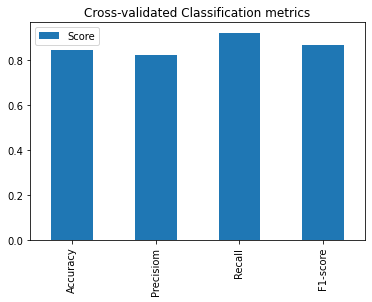

In [60]:
cv_metrics.T.plot(kind = "bar",
                  title = "Cross-validated Classification metrics",
                  );

# Self

In [61]:
# Classification report for RandomForestClassifier
rf_preds = rs_rf.predict(X_test)
rs_rf.score(X_test, y_test)

0.8852459016393442

In [62]:
print(classification_report(y_test,rf_preds))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [63]:
clf2 = RandomForestClassifier(n_estimators = 260,
                              min_samples_split = 16,
                              min_samples_leaf = 9,
                              max_depth = 10,
                              ccp_alpha = 0.1)

In [64]:
cv_accuracy = cross_val_score(clf2,
                X,
                y,
                scoring = "accuracy").mean()

In [65]:
cv_precision = cross_val_score(clf2,
                X,
                y,
                scoring = "precision").mean()

In [67]:
cv_recall = cross_val_score(clf2,
                X,
                y,
                scoring = "recall").mean()

In [68]:
cv_f1 = cross_val_score(clf2,
                X,
                y,
                scoring = "f1").mean()

In [69]:
cv_accuracy

0.8150273224043716

In [70]:
cv_precision

0.7912531328320802

In [71]:
cv_recall

0.9333333333333333

In [72]:
cv_f1

0.8556146851076429

In [73]:
rf_cv_metrics = pd.DataFrame({'Accuracy' : cv_accuracy,
                             'Precision': cv_precision,
                             'Recall'   : cv_recall,
                             'F1'       : cv_f1},
                             index= ["Score"])

In [74]:
rf_cv_metrics.T

,Score
Accuracy,0.815027
Precision,0.791253
Recall,0.933333
F1,0.855615


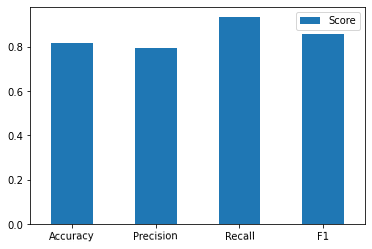

In [75]:
rf_cv_metrics.T.plot.bar()
plt.xticks(rotation=1);

### Feature importance 
Feature importance is another way as asking, " Which features contributed most to the outcomes of the model and how did they contribute."

Finding feature importance is different for each machine leaning model.

Lets find the feature importance for our LogisticRegression model.

In [76]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [77]:
importance = clf.coef_
type(importance)

numpy.ndarray

In [78]:
features_dict = dict(zip(df.columns, list(importance[0])))

In [79]:
features_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

In [80]:
# Visualize feature importance
feature_df = pd.DataFrame(features_dict, index=["0"])
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.003167,-0.860447,0.66067,-0.01157,-0.001664,0.043861,0.312758,0.024594,-0.604131,-0.568628,0.450516,-0.636099,-0.676634


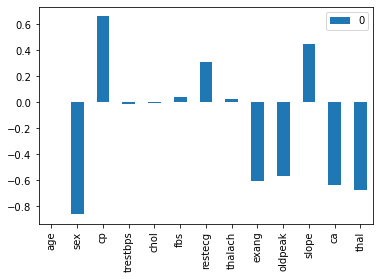

In [81]:

feature_df.T.plot.bar();


# 6. Experimentation

If you haven't hit your evaluation metric yet.... ask yourself.....
* Could you collect more data?
* Could you try a better model? Like Catboost or XGBoost
* Could we improve the current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

